# Neural & Behavioral Modeling - Week 4 (Exercises)
by 孫珮文 (b03b02058@ntu.edu.tw)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from numpy import linalg as LA
from sklearn.decomposition import PCA
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from IPython.display import *
import random
import numpy as np
import math
from scipy import stats

## 1 Replicate exisiting findings/models 
Based on your personal interest, please choose and replicate ONE of the following studies:

1. <a href="http://ccl.northwestern.edu/netlogo/models/FlockingVeeFormations">Flocking Vee Formations</a> in NetLogo's [Sample Models::Biology]

2. <a href="http://ccl.northwestern.edu/netlogo/models/WolfSheepPredation">Wolf-Sheep Predation</a> in NetLogo's [Sample Models::Biology] 

3. <a href="https://www.wetalk.tw/thread-36278-1-1.html">MIT Matching Game</a>

4. Gray, K., Rand, D. G., Ert, E., Lewis, K., Hershman, S., & Norton, M. I. (2014). <a href="http://www.mpmlab.org/groups/">The emergence of “us and them” in 80 lines of code: Modeling group genesis in homogeneous populations</a>. Psychological Science, 25(4), 982-990. 

5. Luhmann, C. C., & Rajaram, S. (2015). <a href="http://journals.sagepub.com/doi/abs/10.1177/0956797615605798">Memory transmission in small groups and large networks: An agent-based model</a>. Psychological Science, 26(12), 1909-1917.

Number of Players = 12 , Number of Rounds = 1000
Reciprocity = 3 ,Transitivity = 2 ,Cooperation Adjustment = 0
ClusterCoeff = 1.0 
AveragePayoff = 0.296


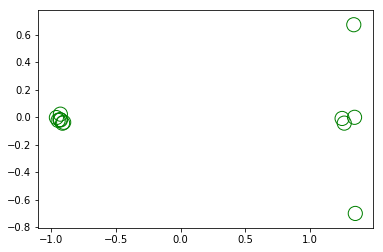

In [5]:
# 4. The emergence of “us and them” in 80 lines of code

def plot_world(SCORE):
    clf() # clear previous figure
    x = SCORE[:,0]+((np.random.rand(len(SCORE[:,0]), 1)-0.5)*0.1 ).flatten()
    y = SCORE[:,1]+((np.random.rand(len(SCORE[:,0]), 1)-0.5)*0.1 ).flatten()
    plt.scatter(x, y, s=200, facecolor='none',edgecolors='g')
    plt.gca().set_adjustable("box")
    display(gcf()); clear_output(wait=True) # to allow dynamic plots
    
#------------------------------------------------#
numplay = 12; numrounds = 1000; setpoint = 0.5; 
A = 0; r = 3; t = 2; graphrounds = 10;
coopcoop = 1; coopdefect = -3; defectdefect = -1; defectcoop = 3;

#------------------------------------------------#
Probx = np.full((numplay, numplay), setpoint)
fill_diagonal(Probx, 0)

Payx = np.full((numplay), 0)
Payx
for rounds in range(1, numrounds+1):
    n = math.ceil(random.random()*numplay)-1
    m = math.ceil(random.random()*(numplay-1))-1
    if m>=n:
        m+=1 
    ProbInt = Probx[n][m]  
    
    if ProbInt > random.random():
        if ProbInt > (random.random()-A):
            pnstr = 1;
        else: 
            pnstr = 0;
            
        if ProbInt > (random.random()-A):
            pmstr = 1
        else:
            pmstr = 0
        #print(pmstr, pnstr)
        
        if pnstr ==0 and pmstr ==0:
            Payx[n] += defectdefect
            Payx[m] += defectdefect
            
            Probx[n][m] = ProbInt/r
            Probx[m][n] = Probx[n][m]
            #print(pnstr, pmstr, '00', Probx[n][m], Probx[m][n])
            
        elif pnstr ==0 and pmstr ==1:
            Payx[n] += defectcoop
            Payx[m] += coopdefect
           # print(pnstr, pmstr, '01', Probx[n][m], Probx[m][n])
            
        elif pnstr ==1 and pmstr ==0:
            Payx[n] += coopdefect
            Payx[m] += defectcoop
            #print(pnstr, pmstr, '10', Probx[n][m], Probx[m][n])
            
        elif pnstr ==1 and pmstr ==1:
            Payx[n] += coopcoop
            Payx[m] += coopcoop
            
            Probx[n][m] = 1-(1-ProbInt)/r
            Probx[m][n] = Probx[n][m]
            #print(pnstr, pmstr, '11', Probx[n][m], Probx[m][n])

        if pnstr==1 and pmstr ==1:
            for g in range(numplay):
                if(g!=n and g!=m):
                    if( abs(Probx[n][g]-setpoint) > abs(Probx[m][g]-setpoint) ):
                        if(Probx[n][g] > setpoint):
                            Probx[m][g] = 1 - (1-Probx[m][g])/t
                            Probx[g][m] = Probx[m][g]
                            
                        elif(Probx[n][g] < setpoint):
                            Probx[m][g] = Probx[m][g]/t
                            Probx[g][m] = Probx[m][g]
                            
                    elif( abs( Probx[m][g]-setpoint) > abs(Probx[n][g]-setpoint) ):
                        if(Probx[m][g] > setpoint):
                            Probx[n][g] = 1 - (1-Probx[n][g])/t
                            Probx[g][n] = Probx[n][g]
                            
                        elif(Probx[m][g] < setpoint):
                            Probx[n][g] = Probx[n][g]/t
                            Probx[g][n] = Probx[n][g]
        #print(Probx)             
        if( math.ceil(rounds/graphrounds)==(rounds/graphrounds) ):
            pca = PCA(n_components=2)
            SCORE = pca.fit_transform(Probx)
            plot_world(SCORE)

ClusterMatrix = Probx
for g in range(numplay):
    for h in range(numplay):
        ClusterMatrix[g][h] += (random.random()-0.5)/1000

ClusterMatrix = np.round(ClusterMatrix)

Numerator = trace( LA.matrix_power(ClusterMatrix,3)) # matrix power != numeric power
Denominator =sum( LA.matrix_power(ClusterMatrix,2)) - trace( LA.matrix_power(ClusterMatrix,2) )
if Denominator ==0:
    ClusterCoeff = 0
else:
    ClusterCoeff = Numerator/Denominator
AveragePayoff = mean(Payx)*numplay/(numrounds*2)

#print(Probx)
print("Number of Players =",numplay, ", Number of Rounds =",numrounds)
print("Reciprocity =",r, ",Transitivity =",t, ",Cooperation Adjustment =", A)

print('ClusterCoeff =',ClusterCoeff, '\nAveragePayoff =', AveragePayoff)
